In [1]:
import polars as pl
from plotnine import *

In [2]:
def show_all(df, width=200, max_col_width=True):
    '''
    Prints an entire polars dataframe in the console or notebook output.
    Parameters
    ----------
    df : pl.DataFrame
        The dataframe to be printed.
    width : int, optional
        The width of the printed dataframe.
        Defaults to 200.
    max_col_width : bool, optional
        Whether to set the maximum column width.
        i.e. it will print the full contents of the cells.
        Defaults to True.
    '''
    with  pl.Config()  as  cfg:
        cfg.set_tbl_cols(-1)
        cfg.set_tbl_rows(-1)
        cfg.set_tbl_width_chars(width)
        if  max_col_width  or  len(df.columns) ==  1:
            cfg.set_fmt_str_lengths(width)
        print(df)

In [3]:
# Just take the 1st community from each example
knowns = [10*i for i in range(11)]

dfs = []
for known in knowns:
    df = pl.read_csv(f'output_singlem/singlem/known{known}/marine0.smf', separator='\t')
    df = df.with_columns(pl.lit(known).alias('known'))
    dfs.append(df)

df = pl.concat(dfs)
df

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,known
str,i64,i64,f64,i64,str,i32
"""marine0.1""",5985974985,6027455700,99.31,3649985,null,0
"""marine0.1""",6651981388,6785814600,98.03,4141492,null,10
"""marine0.1""",5767886379,5924916300,97.35,3718698,null,20
"""marine0.1""",6532226720,6597711300,99.01,4029428,null,30
"""marine0.1""",5885363364,5954024700,98.85,3683763,null,40
"""marine0.1""",7034148915,6991309200,100.0,4274623,null,50
"""marine0.1""",4880620562,4950014100,98.6,3020915,null,60
"""marine0.1""",6156370865,6180967800,99.6,3749153,null,70
"""marine0.1""",5063392526,4819163100,100.0,3156827,null,80


In [4]:
df = df.with_columns(pl.col('bacterial_archaeal_bases').alias('smf')/pl.col('metagenome_size')*100)
df

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,known,smf
str,i64,i64,f64,i64,str,i32,f64
"""marine0.1""",5985974985,6027455700,99.31,3649985,null,0,99.311804
"""marine0.1""",6651981388,6785814600,98.03,4141492,null,10,98.02775
"""marine0.1""",5767886379,5924916300,97.35,3718698,null,20,97.349669
"""marine0.1""",6532226720,6597711300,99.01,4029428,null,30,99.007465
"""marine0.1""",5885363364,5954024700,98.85,3683763,null,40,98.846808
"""marine0.1""",7034148915,6991309200,100.0,4274623,null,50,100.612757
"""marine0.1""",4880620562,4950014100,98.6,3020915,null,60,98.598114
"""marine0.1""",6156370865,6180967800,99.6,3749153,null,70,99.602054
"""marine0.1""",5063392526,4819163100,100.0,3156827,null,80,105.06788


In [5]:
df

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,known,smf
str,i64,i64,f64,i64,str,i32,f64
"""marine0.1""",5985974985,6027455700,99.31,3649985,null,0,99.311804
"""marine0.1""",6651981388,6785814600,98.03,4141492,null,10,98.02775
"""marine0.1""",5767886379,5924916300,97.35,3718698,null,20,97.349669
"""marine0.1""",6532226720,6597711300,99.01,4029428,null,30,99.007465
"""marine0.1""",5885363364,5954024700,98.85,3683763,null,40,98.846808
"""marine0.1""",7034148915,6991309200,100.0,4274623,null,50,100.612757
"""marine0.1""",4880620562,4950014100,98.6,3020915,null,60,98.598114
"""marine0.1""",6156370865,6180967800,99.6,3749153,null,70,99.602054
"""marine0.1""",5063392526,4819163100,100.0,3156827,null,80,105.06788


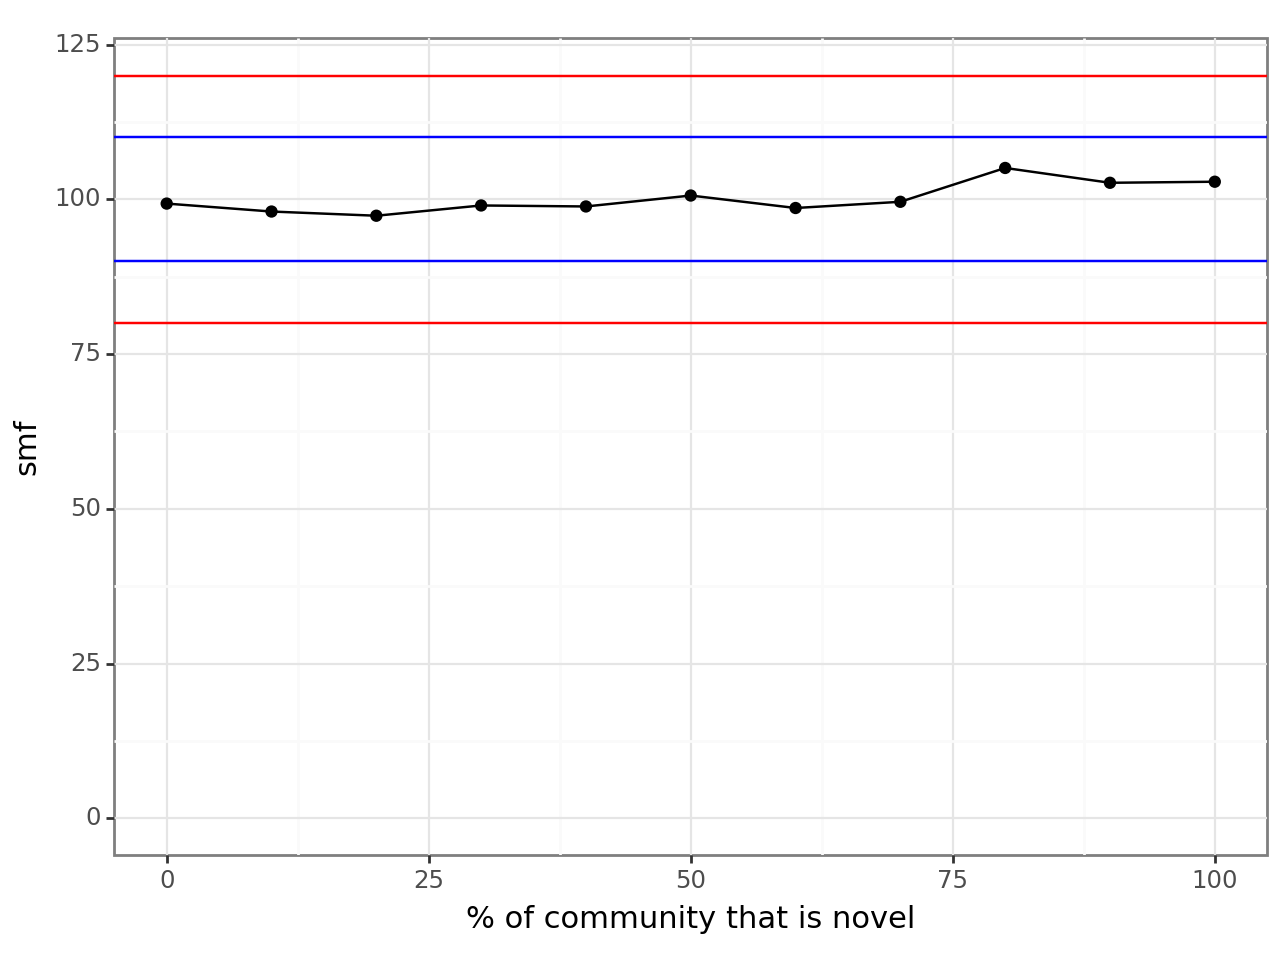

<Figure Size: (640 x 480)>

In [6]:
# df = df.with_columns((100-pl.col('known').cast(pl.Int32)).alias('novelty'))

# 0-100% y-axis
ggplot(df, aes(x='known', y='smf')) + geom_point() + theme_bw() + ylim(0,120) + geom_line() + labs(x='% of community that is novel') + geom_hline(yintercept=[110,90], colour='blue') + geom_hline(yintercept=[120,80], colour='red')

## Overall accuracy

In [7]:
df.select((pl.col('smf')-100).abs().mean())

smf
f64
1.859327


In [ ]:
# known==100 is actually fully novelty - it is badly named.
df.filter(pl.col('known')==100).select((pl.col('smf')-100).abs().mean())

smf
f64
2.843062


# Accuracy of average genome size calculations

In [7]:
# truth condensed file has coverage of each genome simulated, needed for weighting the AGS calc

# Just take the 1st community from each example as above
knowns = [10*i for i in range(11)]

truths = []
for known in knowns:
    truth = pl.read_csv(f'4_complex_and_novel/truths/known{known}/marine0.condensed', separator='\t')
    truth = truth.with_columns(pl.lit(known).alias('known'))
    truths.append(truth)

truth = pl.concat(truths)
# Add an index column to the truth dataframe
truth = truth.insert_column(0, pl.Series('index', range(truth.shape[0])))

truth[:4]

index,sample,coverage,taxonomy,known
i64,str,f64,str,i32
0,"""coverage0.tsv""",4.54952,"""d__Archaea;p__…",0
1,"""coverage0.tsv""",1.84757,"""d__Bacteria;p_…",0
2,"""coverage0.tsv""",5.7302,"""d__Bacteria;p_…",0
3,"""coverage0.tsv""",1.5818,"""d__Bacteria;p_…",0


In [8]:
# r207 gtdbtk has the taxonomy of each reference ID
gtdb_bac = pl.read_csv('gtdbtk_batchfile.random1000.gtdbtk_r207/gtdbtk.bac120.summary.tsv', separator='\t').select(['user_genome', 'classification'])
gtdb_ar = pl.read_csv('gtdbtk_batchfile.random1000.gtdbtk_r207/gtdbtk.ar53.summary.tsv', separator='\t').select(['user_genome', 'classification'])
gtdb_bac[:4], gtdb_ar[:4]
tk = pl.concat([gtdb_bac, gtdb_ar])
tk.shape, tk[:4]

((1000, 2),
 shape: (4, 2)
 ┌────────────────────┬───────────────────────────────────┐
 │ user_genome        ┆ classification                    │
 │ ---                ┆ ---                               │
 │ str                ┆ str                               │
 ╞════════════════════╪═══════════════════════════════════╡
 │ GB_GCA_019264575.1 ┆ d__Bacteria;p__Cyanobacteria;c__… │
 │ GB_GCA_019309545.1 ┆ d__Bacteria;p__Desulfobacterota;… │
 │ GB_GCA_019347675.1 ┆ d__Bacteria;p__Actinobacteriota;… │
 │ GB_GCA_019355395.1 ┆ d__Bacteria;p__Firmicutes_A;c__C… │
 └────────────────────┴───────────────────────────────────┘)

In [9]:
# Read plain r207 metadata to get non-novel species info
ar = pl.read_csv('~/m/db/gtdb/gtdb_release207/ar53_metadata_r207.tsv', separator='\t')
ar = ar.filter(pl.col('gtdb_representative')=='t')
bac = pl.read_csv('~/m/db/gtdb/gtdb_release207/bac120_metadata_r207.tsv', separator='\t', ignore_errors=True)
bac = bac.filter(pl.col('gtdb_representative')=='t')
r207 = pl.concat([ar, bac]).select(['accession', 'gtdb_taxonomy'])
r207.shape, r207[:4]

((65703, 2),
 shape: (4, 2)
 ┌────────────────────┬───────────────────────────────────┐
 │ accession          ┆ gtdb_taxonomy                     │
 │ ---                ┆ ---                               │
 │ str                ┆ str                               │
 ╞════════════════════╪═══════════════════════════════════╡
 │ GB_GCA_000016605.1 ┆ d__Archaea;p__Thermoproteota;c__… │
 │ GB_GCA_000200715.1 ┆ d__Archaea;p__Thermoproteota;c__… │
 │ GB_GCA_000247545.1 ┆ d__Archaea;p__Thermoproteota;c__… │
 │ GB_GCA_000306725.1 ┆ d__Archaea;p__Halobacteriota;c__… │
 └────────────────────┴───────────────────────────────────┘)

In [10]:
tk = tk.with_columns(pl.lit('gtdbtk').alias('source'))
r207 = r207.with_columns(pl.lit('r207').alias('source'))
tk = tk.rename({'user_genome': 'accession'})
tk = tk.rename({'classification': 'gtdb_taxonomy'})
taxonomies = pl.concat([tk, r207])

In [11]:
taxonomies = taxonomies.with_columns(pl.col('gtdb_taxonomy').str.replace(r';s__$', '').str.replace(r';g__$', '').str.replace(r';f__$', '').str.replace(r';o__$', '').str.replace(r';c__$', '').str.replace(r';p__$', '').alias('taxonomy')).select(pl.exclude('gtdb_taxonomy'))
# show_all(truth.filter(~(pl.col('taxonomy').is_in(taxonomies['taxonomy']))))

In [12]:
truth_accs = truth.join(taxonomies, on='taxonomy').group_by('index').first()
if len(truth) != len(truth_accs):
    print('Some classifications not found in GTDBTK: ', len(truth), len(truth_accs))

In [13]:
truth_accs.sample(10)

index,sample,coverage,taxonomy,known,accession,source
i64,str,f64,str,i32,str,str
881,"""coverage0.tsv""",1.32162,"""d__Bacteria;p_…",20,"""GB_GCA_9003157…","""r207"""
3223,"""coverage0.tsv""",2.43023,"""d__Bacteria;p_…",80,"""RS_GCF_0201936…","""gtdbtk"""
10,"""coverage0.tsv""",1.57354,"""d__Bacteria;p_…",0,"""GB_GCA_9004664…","""r207"""
1814,"""coverage0.tsv""",1.32395,"""d__Bacteria;p_…",40,"""RS_GCF_0226784…","""gtdbtk"""
3060,"""coverage0.tsv""",1.33144,"""d__Bacteria;p_…",80,"""RS_GCF_0036886…","""r207"""
959,"""coverage0.tsv""",2.75543,"""d__Bacteria;p_…",20,"""RS_GCF_0002992…","""r207"""
3927,"""coverage0.tsv""",6.52049,"""d__Bacteria;p_…",100,"""GB_GCA_0212017…","""gtdbtk"""
2100,"""coverage0.tsv""",1.33696,"""d__Bacteria;p_…",50,"""GB_GCA_0220598…","""gtdbtk"""
1799,"""coverage0.tsv""",3.80335,"""d__Bacteria;p_…",40,"""RS_GCF_0133074…","""gtdbtk"""


In [14]:
# R214 metadata has the r214 taxonomy of each reference ID
r214_bac = pl.read_csv('~/m/db/gtdb/gtdb_release214/bac120_metadata_r214.tsv', separator='\t').select(['accession', pl.col('gtdb_taxonomy').alias('r214_taxonomy')])
r214_ar = pl.read_csv('~/m/db/gtdb/gtdb_release214/ar53_metadata_r214.tsv', separator='\t').select(['accession', pl.col('gtdb_taxonomy').alias('r214_taxonomy')])
r214 = pl.concat([r214_bac, r214_ar])
r214.shape, r214[:4]

((402709, 2),
 shape: (4, 2)
 ┌────────────────────┬───────────────────────────────────┐
 │ accession          ┆ r214_taxonomy                     │
 │ ---                ┆ ---                               │
 │ str                ┆ str                               │
 ╞════════════════════╪═══════════════════════════════════╡
 │ GB_GCA_000006155.2 ┆ d__Bacteria;p__Bacillota;c__Baci… │
 │ GB_GCA_000007325.1 ┆ d__Bacteria;p__Fusobacteriota;c_… │
 │ GB_GCA_000007385.1 ┆ d__Bacteria;p__Pseudomonadota;c_… │
 │ GB_GCA_000008525.1 ┆ d__Bacteria;p__Campylobacterota;… │
 └────────────────────┴───────────────────────────────────┘)

In [15]:
# Make an accession sans GCF/GCA because some changed
r214 = r214.with_columns(pl.col('accession').str.replace(r'^......_', '').alias('accession2'))
truth_accs = truth_accs.with_columns(pl.col('accession').str.replace(r'^......_', '').alias('accession2'))

truth_acc_r214 = truth_accs.join(r214, on='accession2', how='left')
bads = truth_acc_r214.filter(pl.col('r214_taxonomy').is_null())
bads.shape, show_all(truth_acc_r214.filter(pl.col('r214_taxonomy').is_null()).sample(5))
# Some show up here - genomes that were in r207 but not r214, blargh, will have to treat these separately.

shape: (5, 10)
┌───────┬───────────────┬──────────┬─────────────────────────────────────────────────────────────────────────────┬───────┬────────────────────┬────────┬─────────────┬─────────────────┬───────────────┐
│ index ┆ sample        ┆ coverage ┆ taxonomy                                                                    ┆ known ┆ accession          ┆ source ┆ accession2  ┆ accession_right ┆ r214_taxonomy │
│ ---   ┆ ---           ┆ ---      ┆ ---                                                                         ┆ ---   ┆ ---                ┆ ---    ┆ ---         ┆ ---             ┆ ---           │
│ i64   ┆ str           ┆ f64      ┆ str                                                                         ┆ i32   ┆ str                ┆ str    ┆ str         ┆ str             ┆ str           │
╞═══════╪═══════════════╪══════════╪═════════════════════════════════════════════════════════════════════════════╪═══════╪════════════════════╪════════╪═════════════╪═══════════════

((28, 10), None)

In [16]:
# Reads r214 corrected genome sizes
smf_r214_genome_sizes = pl.read_csv('~/m/msingle/mess/167_metapackage_v5/S4.2.2.GTDB_r214.metapackage_20240502.smpkg/gtdb_mean_genome_sizes.tsv', separator='\t')
smf_r207_genome_sizes = pl.read_csv('~/m/msingle/mess/167_metapackage_v5/S4.1.0.GTDB_r207.metapackage_20240502.smpkg/gtdb_mean_genome_sizes.tsv', separator='\t')
smf_r207_genome_sizes[:4], smf_r214_genome_sizes[:4]


(shape: (4, 2)
 ┌─────────────────────┬─────────────┐
 │ rank                ┆ genome_size │
 │ ---                 ┆ ---         │
 │ str                 ┆ f64         │
 ╞═════════════════════╪═════════════╡
 │ d__Bacteria         ┆ 3.2473e6    │
 │ d__Archaea          ┆ 1.7439e6    │
 │ p__Thermoplasmatota ┆ 1.9290e6    │
 │ p__Thermoproteota   ┆ 1.7695e6    │
 └─────────────────────┴─────────────┘,
 shape: (4, 2)
 ┌────────────────┬─────────────┐
 │ rank           ┆ genome_size │
 │ ---            ┆ ---         │
 │ str            ┆ f64         │
 ╞════════════════╪═════════════╡
 │ d__Bacteria    ┆ 3.2890e6    │
 │ d__Archaea     ┆ 1.7394e6    │
 │ p__CAIJMQ01    ┆ 1.5830e6    │
 │ p__CSSED10-310 ┆ 5.2606e6    │
 └────────────────┴─────────────┘)

In [17]:
# Merge to truth
truth_acc_r214 = truth_acc_r214.with_columns(pl.col('r214_taxonomy').str.split(';').list.get(6).alias('r214_species'))
truth_acc_r214_size214 = truth_acc_r214.join(smf_r214_genome_sizes, left_on='r214_species', right_on='rank', how='left')
truth_acc_r214_size214 = truth_acc_r214_size214.rename({'genome_size': 'genome_size_r214'})
truth_acc_r214_size214_size207 = truth_acc_r214_size214.with_columns(pl.col('taxonomy').str.split(';').list.get(6).alias('r207_species')).join(smf_r207_genome_sizes, left_on='r207_species', right_on='rank')
truth_acc_r214_size214_size207 = truth_acc_r214_size214_size207.rename({'genome_size': 'genome_size_r207'})
truth_acc_r214_size214_size207 = truth_acc_r214_size214_size207.with_columns(
    pl.when(pl.col('genome_size_r214').is_null()).then(pl.col('genome_size_r207')).otherwise(pl.col('genome_size_r214')).alias('genome_size_final'))
show_all(truth_acc_r214_size214_size207.sample(4))

shape: (4, 15)
┌───────┬──────────────┬──────────┬──────────────┬───────┬──────────────┬────────┬─────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬─────────────┐
│ index ┆ sample       ┆ coverage ┆ taxonomy     ┆ known ┆ accession    ┆ source ┆ accession2  ┆ accession_ri ┆ r214_taxonom ┆ r214_species ┆ genome_size_ ┆ r207_species ┆ genome_size_ ┆ genome_size │
│ ---   ┆ ---          ┆ ---      ┆ ---          ┆ ---   ┆ ---          ┆ ---    ┆ ---         ┆ ght          ┆ y            ┆ ---          ┆ r214         ┆ ---          ┆ r207         ┆ _final      │
│ i64   ┆ str          ┆ f64      ┆ str          ┆ i32   ┆ str          ┆ str    ┆ str         ┆ ---          ┆ ---          ┆ str          ┆ ---          ┆ str          ┆ ---          ┆ ---         │
│       ┆              ┆          ┆              ┆       ┆              ┆        ┆             ┆ str          ┆ str          ┆              ┆ f64          ┆              ┆ f64      

In [18]:
# Finally, actually calculate the AGS of the truth
ags = truth_acc_r214_size214_size207.with_columns(
    (pl.col('genome_size_final')*pl.col('coverage')).alias('contribution')
).select('coverage','known','contribution').group_by('known').sum().select('known', (pl.col('contribution')/pl.col('coverage')).alias('true ags'))
show_all(ags)

shape: (11, 2)
┌───────┬──────────┐
│ known ┆ true ags │
│ ---   ┆ ---      │
│ i32   ┆ f64      │
╞═══════╪══════════╡
│ 80    ┆ 3.1375e6 │
│ 90    ┆ 3.8870e6 │
│ 70    ┆ 4.5693e6 │
│ 60    ┆ 3.6401e6 │
│ 40    ┆ 3.7695e6 │
│ 50    ┆ 5.4446e6 │
│ 20    ┆ 3.6790e6 │
│ 30    ┆ 3.9856e6 │
│ 100   ┆ 4.5082e6 │
│ 0     ┆ 4.0517e6 │
│ 10    ┆ 3.7100e6 │
└───────┴──────────┘


In [19]:
# Compare with singlem
ags_singlem = ags.join(df.select('known',pl.col('average_bacterial_archaeal_genome_size').alias('singlem ags')), on='known')
ags_singlem

known,true ags,singlem ags
i32,f64,i64
0,4.0517e6,3649985
10,3.7100e6,4141492
20,3.6790e6,3718698
30,3.9856e6,4029428
40,3.7695e6,3683763
50,5.4446e6,4274623
60,3.6401e6,3020915
70,4.5693e6,3749153
80,3.1375e6,3156827


In [20]:
# Read microbe census
# Just take the 1st community from each example
knowns = [10*i for i in range(11)]

censi = []
for known in knowns:
    with open(f'output_microbe_census/microbe_census/known{known}/marine0.tsv') as f:
        for l in f:
            if 'average_genome_size' in l:
                avg = float(l.split('\t')[1].strip())
                censi.append(pl.DataFrame({
                    'known': known,
                    'microbe census ags': avg
                }).cast({'known': pl.Int32}))
                censi

census = pl.concat(censi)
census

known,microbe census ags
i32,f64
0,3.6130e6
10,4.2659e6
20,3.7100e6
30,3.9251e6
40,3.6943e6
50,4.2986e6
60,2.9209e6
70,3.7930e6
80,2.8811e6


In [21]:
ags_singlem_mc = ags_singlem.join(census, on='known', how='left')

In [22]:
ags_melt = ags_singlem_mc.melt(id_vars='known', variable_name='ags').select('known', 'ags', (pl.col('value')/1e6).alias('Mbp'))

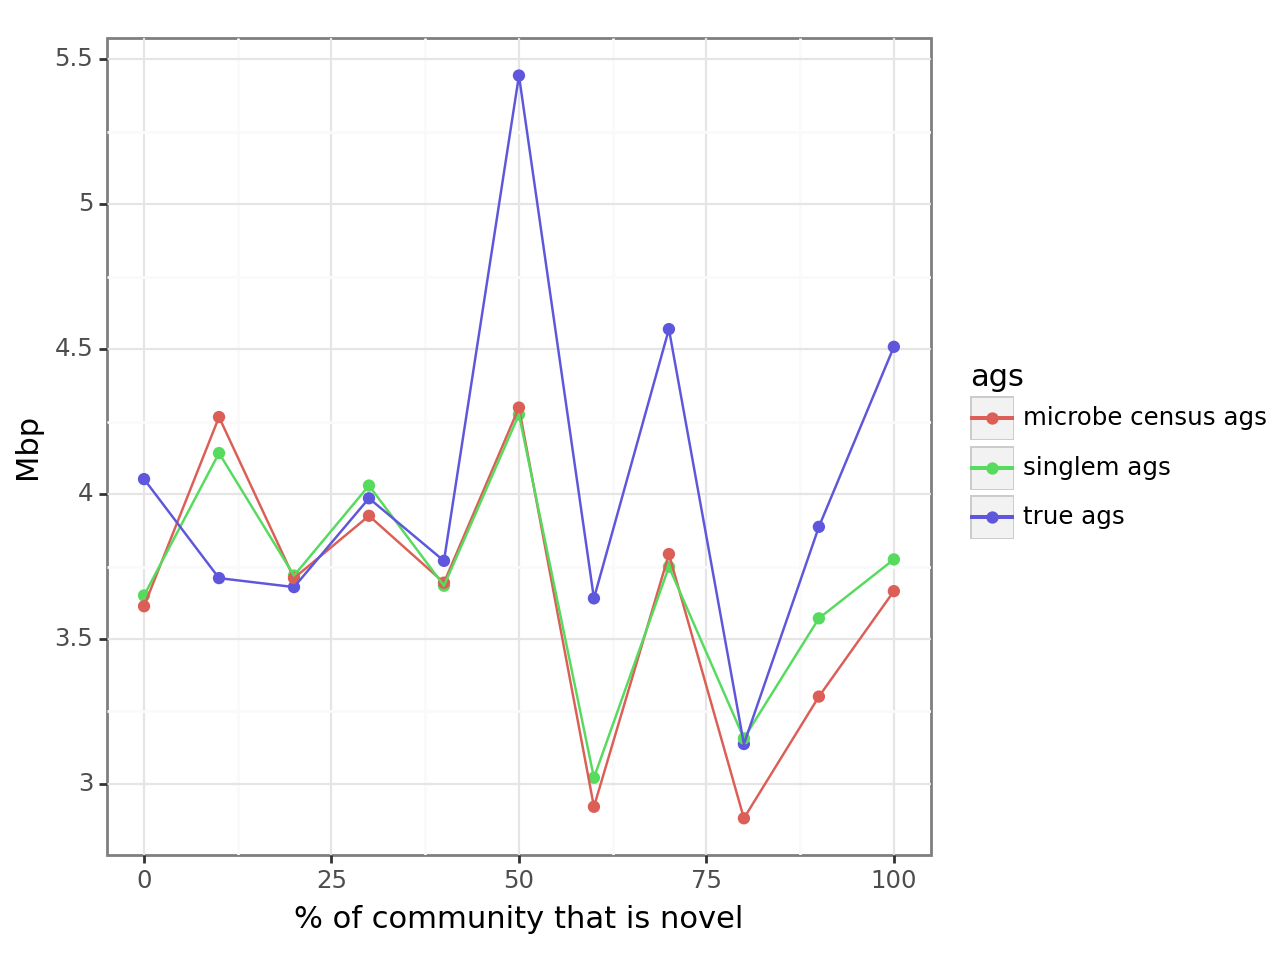

<Figure Size: (640 x 480)>

In [23]:
ggplot(ags_melt, aes(x='known', y='Mbp', colour='ags')) + geom_point() + theme_bw() + geom_line() + labs(x='% of community that is novel') #+ geom_hline(yintercept=[110,90], colour='blue') + geom_hline(yintercept=[120,80], colour='red')

In [24]:
# Use actual genome sizes, not inferred
genome_sizes = pl.read_csv('genome_sizes.tsv', separator='\t')
genome_sizes = genome_sizes.with_columns(pl.col('file').str.split('/').list.get(-1).str.split('.').list.get(0).alias('accession'))
show_all(genome_sizes[:4])
show_all(genome_sizes[-3:])

shape: (4, 9)
┌───────────────────────────────────────────────────────────┬────────┬──────┬──────────┬─────────┬─────────┬────────────┬─────────┬──────────────────┐
│ file                                                      ┆ format ┆ type ┆ num_seqs ┆ sum_len ┆ min_len ┆ avg_len    ┆ max_len ┆ accession        │
│ ---                                                       ┆ ---    ┆ ---  ┆ ---      ┆ ---     ┆ ---     ┆ ---        ┆ ---     ┆ ---              │
│ str                                                       ┆ str    ┆ str  ┆ i64      ┆ i64     ┆ i64     ┆ f64        ┆ i64     ┆ str              │
╞═══════════════════════════════════════════════════════════╪════════╪══════╪══════════╪═════════╪═════════╪════════════╪═════════╪══════════════════╡
│ ../tool_reference_data/new_in_r214/GB_GCA_019264575.1.fna ┆ FASTA  ┆ DNA  ┆ 27       ┆ 2671570 ┆ 5674    ┆ 98947.0    ┆ 447445  ┆ GB_GCA_019264575 │
│ ../tool_reference_data/new_in_r214/GB_GCA_019309545.1.fna ┆ FASTA  ┆ DNA  ┆ 96

In [25]:
# merge the r207 gtdb taxonomy, because the accessions are the rep genome accessions, but genome sizes are the shadow
r207_all_ar = pl.read_csv('~/m/db/gtdb/gtdb_release207/ar53_metadata_r207.tsv', separator='\t').select(['accession', 'gtdb_taxonomy','gtdb_genome_representative'])
r207_all_ar

# r207_all_bac = pl.read_csv('~/m/db/gtdb/gtdb_release207/bac120_metadata_r207.tsv', separator='\t').select(['accession', 'gtdb_taxonomy'])
# r207 = pl.concat([r207_all_ar, r207_all_bac])
# r207 = r207.with_columns(pl.col('accession').str.split('.').list.get(0).str.replace(r'.*_','').alias('accession3'))
# genome_sizes = genome_sizes.with_columns(pl.col('accession').str.replace(r'^.*_', '').str.split('.').list.get(0).alias('accession3'))
# genome_sizes2 = genome_sizes.join(r207, on='accession3')
# r207[:4], genome_sizes[:4], genome_sizes2[:4], r207.shape

accession,gtdb_taxonomy,gtdb_genome_representative
str,str,str
"""GB_GCA_0000166…","""d__Archaea;p__…","""GB_GCA_0000166…"
"""GB_GCA_0002007…","""d__Archaea;p__…","""GB_GCA_0002007…"
"""GB_GCA_0002475…","""d__Archaea;p__…","""GB_GCA_0002475…"
"""GB_GCA_0003067…","""d__Archaea;p__…","""GB_GCA_0003067…"
"""GB_GCA_0003756…","""d__Archaea;p__…","""GB_GCA_0003756…"
"""GB_GCA_0003879…","""d__Archaea;p__…","""GB_GCA_0003879…"
"""GB_GCA_0004027…","""d__Archaea;p__…","""GB_GCA_0004027…"
"""GB_GCA_0004029…","""d__Archaea;p__…","""GB_GCA_0004941…"
"""GB_GCA_0008060…","""d__Archaea;p__…","""GB_GCA_0008060…"


In [26]:
truth_accs = truth_accs.with_columns(pl.col('accession').str.replace(r'^......_', '').str.split('.').list.get(0).alias('accession3'))
genome_sizes = genome_sizes.with_columns(pl.col('accession').str.replace(r'^.*_', '').str.split('.').list.get(0).alias('accession3'))
show_all(genome_sizes[:4])
show_all(genome_sizes[-3:])
truth_accs_genome_sizes = truth_accs.join(genome_sizes, on='accession3', how='left')
show_all(truth_accs_genome_sizes.filter(pl.col('file').is_null()).shape)
show_all(truth_accs_genome_sizes.filter(pl.col('file').is_null()).sample(4))

shape: (4, 10)
┌───────────────────────────────────────────────────────────┬────────┬──────┬──────────┬─────────┬─────────┬────────────┬─────────┬──────────────────┬────────────┐
│ file                                                      ┆ format ┆ type ┆ num_seqs ┆ sum_len ┆ min_len ┆ avg_len    ┆ max_len ┆ accession        ┆ accession3 │
│ ---                                                       ┆ ---    ┆ ---  ┆ ---      ┆ ---     ┆ ---     ┆ ---        ┆ ---     ┆ ---              ┆ ---        │
│ str                                                       ┆ str    ┆ str  ┆ i64      ┆ i64     ┆ i64     ┆ f64        ┆ i64     ┆ str              ┆ str        │
╞═══════════════════════════════════════════════════════════╪════════╪══════╪══════════╪═════════╪═════════╪════════════╪═════════╪══════════════════╪════════════╡
│ ../tool_reference_data/new_in_r214/GB_GCA_019264575.1.fna ┆ FASTA  ┆ DNA  ┆ 27       ┆ 2671570 ┆ 5674    ┆ 98947.0    ┆ 447445  ┆ GB_GCA_019264575 ┆ 019264575  │
│